# Варіант 9 - Панченко Єгор

## Умова

Побудувати моделі наївної байесівської класифікації за припущень:
- Дані в кожному класі мають нормальний розподіл без коваріації між вимірами; використати клас **sklearn.naive_bayes.GaussianNB**
- Дані в кожному класі мають поліноміальний розподіл; використати клас **sklearn.naive_bayes.MultinomialNB**
- Для кожної моделі розрахувати апостеріорні імовірності для тестового прикладу, використовуючи метод **predict_proba**

### Розв'язок

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_circles

C:\Users\panen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Функція, яка робить репорт

In [2]:
def MakeReport(generator, X, y, gauss = True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

    y_pred = generator.fit(X_train, y_train).predict(X_test)
    print("Number of mislabeled points out of a total %d points : %d"
       % (X_test.shape[0], (y_test != y_pred).sum()))
    #generator.predict_proba(X_test)[:10]
    
    print("confusion matrix: c_{00} = TN, c_{10} = FN, c_{11} = TP, c_{01} = FP")
    print(confusion_matrix(y_test, y_pred))
    
    print("Precision = ", precision_score(y_test, y_pred))
    print("Recall = ", recall_score(y_test, y_pred))
    print("F1 = ", f1_score(y_test, y_pred))
    
    plot_precision_recall_curve(generator, X, y)
    plot_roc_curve(generator, X, y)
    
    parameters = {'var_smoothing' if gauss == True else 'alpha': [10**i for i in range(-9, 1)]}
    gnb_grid = GridSearchCV(generator, parameters)
    gnb_grid.fit(X, y)

    #print(gnb_grid.cv_results_)
    print("Grid Search results")
    print(gnb_grid.cv_results_['mean_test_score'], gnb_grid.cv_results_['std_test_score'])
    
    y_pred_cross = cross_val_predict(generator, X, y)
    print("Cross validation results")
    print("Precision = ", precision_score(y, y_pred_cross))
    print("Recall = ", recall_score(y, y_pred_cross))
    print("F1 = ", f1_score(y, y_pred_cross))

#### Перший спосіб генерації даних

In [3]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]

X, y = make_blobs(n_samples = [n_samples_1, n_samples_2],
                  centers = centers,
                  cluster_std = clusters_std,
                  random_state = 0, shuffle = False)

Звіти обох методів на цих данних

Number of mislabeled points out of a total 275 points : 7
confusion matrix: c_{00} = TN, c_{10} = FN, c_{11} = TP, c_{01} = FP
[[239   4]
 [  3  29]]
Precision =  0.8787878787878788
Recall =  0.90625
F1 =  0.8923076923076922
Grid Search results
[0.96636364 0.96636364 0.96636364 0.96636364 0.96636364 0.96636364
 0.96636364 0.96636364 0.96272727 0.90909091] [1.02045201e-02 1.02045201e-02 1.02045201e-02 1.02045201e-02
 1.02045201e-02 1.02045201e-02 1.02045201e-02 1.02045201e-02
 1.05234881e-02 1.11022302e-16]
Cross validation results
Precision =  0.8058252427184466
Recall =  0.83
F1 =  0.8177339901477833


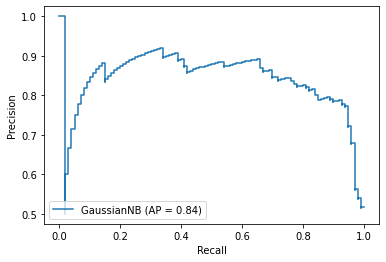

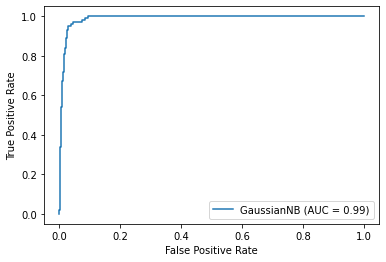

In [4]:
MakeReport(GaussianNB(), X, y)

Number of mislabeled points out of a total 275 points : 32
confusion matrix: c_{00} = TN, c_{10} = FN, c_{11} = TP, c_{01} = FP
[[243   0]
 [ 32   0]]
Precision =  0.0
Recall =  0.0
F1 =  0.0
Grid Search results
[0.90909091 0.90909091 0.90909091 0.90909091 0.90909091 0.90909091
 0.90909091 0.90909091 0.90909091 0.90909091] [1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16 1.11022302e-16 1.11022302e-16
 1.11022302e-16 1.11022302e-16]
Cross validation results
Precision =  0.0
Recall =  0.0
F1 =  0.0


C:\Users\panen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\panen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


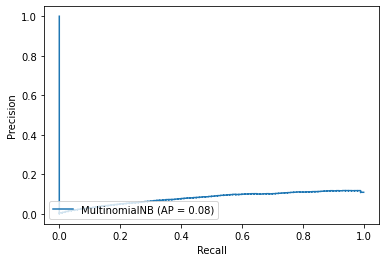

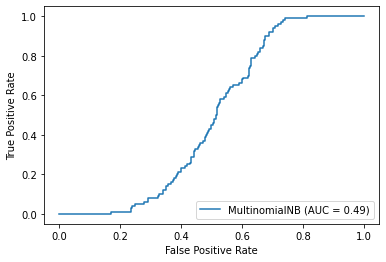

In [5]:
scaler = MinMaxScaler()
scaler.fit(X)
MakeReport(MultinomialNB(), scaler.transform(X), y, False)

#### Другий спосіб генерації даних

In [6]:
X, y = make_circles(500, factor = .1, noise = .1)

Number of mislabeled points out of a total 125 points : 0
confusion matrix: c_{00} = TN, c_{10} = FN, c_{11} = TP, c_{01} = FP
[[65  0]
 [ 0 60]]
Precision =  1.0
Recall =  1.0
F1 =  1.0
Grid Search results
[0.99  0.99  0.99  0.99  0.99  0.99  0.99  0.992 1.    0.878] [0.00632456 0.00632456 0.00632456 0.00632456 0.00632456 0.00632456
 0.00632456 0.00748331 0.         0.02481935]
Cross validation results
Precision =  1.0
Recall =  0.98
F1 =  0.98989898989899


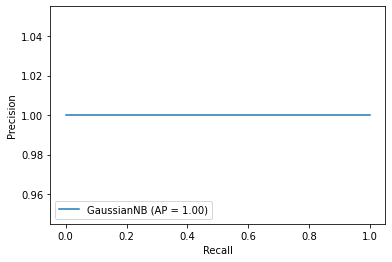

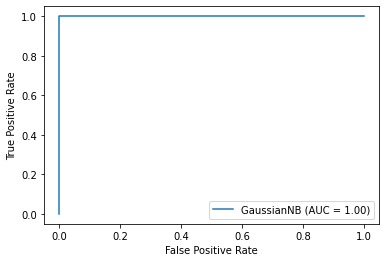

In [7]:
MakeReport(GaussianNB(), X, y)

Number of mislabeled points out of a total 125 points : 65
confusion matrix: c_{00} = TN, c_{10} = FN, c_{11} = TP, c_{01} = FP
[[ 0 65]
 [ 0 60]]
Precision =  0.48
Recall =  1.0
F1 =  0.6486486486486487
Grid Search results
[0.514 0.514 0.514 0.514 0.514 0.514 0.514 0.514 0.514 0.514] [0.04029888 0.04029888 0.04029888 0.04029888 0.04029888 0.04029888
 0.04029888 0.04029888 0.04029888 0.04029888]
Cross validation results
Precision =  0.5136186770428015
Recall =  0.528
F1 =  0.5207100591715976


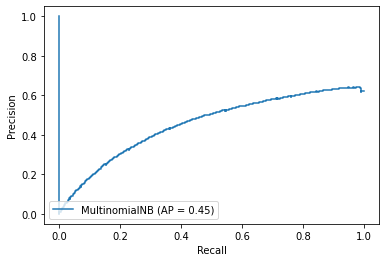

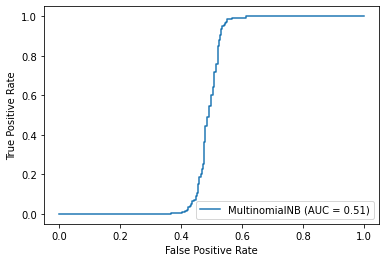

In [8]:
scaler = MinMaxScaler()
scaler.fit(X)
MakeReport(MultinomialNB(), scaler.transform(X), y, False)

### Висновок

Gaussian працює краще, а Multinomial будує baseline model